<a href="https://colab.research.google.com/github/erikrowens/Codecademy/blob/main/LifeExpectancyAndGDP_PortfolioProject/life_expectancy_gdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Life Expecancy and GDP Portfolio Project
For this project, we will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

# Project Scope


*   Goals
  * It's difficult to state goals without having looked at the data or having been given clear objectives by a client. However, before exploring the data available to us, I would say that a good goal would be to try and determine if there is a link between life expectancy and GDP in these countries.
  * Once initial data exploration has been done we can expand our goals based on what we find available to us.
*   Data
  * We will use the *all_data.csv* file supplied from Codecademy and sourced from the World Health Organisation. This file contatins the relevant data from six counties.
*   Analysis
  * We will use tools suchs as numpy, pandas, matplotlib, and seaborne to explore, analyse, and visualise the data.
  * Once completed we will be able draw our conclusions based on our goals for the project.





In [ ]:
#@title
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tick
from matplotlib.ticker import FuncFormatter

# Define methods to be available throughout the execution of the script
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

def billions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fB' % (x * 1e-9)

def reformat_large_tick_values(tick_val, pos):

    """
    Credit: Dan Friedman, https://dfrieds.com/data-visualizations/how-format-large-tick-values.html
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).

    I simlpy adapted the code to handle negactive values by copy/paste of 
    the block of code that handles positive values.
    """
    if tick_val < 0:
      if tick_val <= -1000000000000:
          val = round(tick_val/1000000000000, 1)
          new_tick_format = '-{:}T'.format(val)
      elif tick_val <= -1000000000:
          val = round(tick_val/1000000000, 1)
          new_tick_format = '-{:}B'.format(val)
      elif tick_val <= -1000000:
          val = round(tick_val/1000000, 1)
          new_tick_format = '-{:}M'.format(val)
      elif tick_val <= 1000:
          val = round(tick_val/1000, 1)
          new_tick_format = '-{:}K'.format(val)
      #elif tick_val < 1000:
          #new_tick_format = round(tick_val, 1)
      else:
          new_tick_format = tick_val
    else:  
      if tick_val >= 1000000000000:
          val = round(tick_val/1000000000000, 1)
          new_tick_format = '{:}T'.format(val)
      elif tick_val >= 1000000000:
          val = round(tick_val/1000000000, 1)
          new_tick_format = '{:}B'.format(val)
      elif tick_val >= 1000000:
          val = round(tick_val/1000000, 1)
          new_tick_format = '{:}M'.format(val)
      elif tick_val >= 1000:
          val = round(tick_val/1000, 1)
          new_tick_format = '{:}K'.format(val)
      elif tick_val < 1000:
          new_tick_format = round(tick_val, 1)
      else:
          new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

#Create a method to plot the mean GDP vs. mean life expectancy
#Using a method as this will be called multiple times with different dataframes
#It will also return mean data for the dataframe in the form of a tuple as follows:
#(firstYearGDPMean, lastYearGDPMean, firstYearLifeExpMean, lastYearLifeExpMean)
def plot_meanGDP_vs_meanLife(dataframe, title = "Average Life Expectancy vs. Average GDP" ):
  
  gdpByYear = dataframe.groupby('Year').GDP.mean()
  lifeByYear = dataframe.groupby('Year').LifeExpectancy.mean()

  #https://stackoverflow.com/questions/55654500/seaborn-plot-with-second-y-axis
  x = list(gdpByYear.index)
  y1 = list(lifeByYear.values)
  y2 = list(gdpByYear.values)


  fig, ax1 = plt.subplots()

  ax2 = ax1.twinx()
  ax1.bar(x, y1)
  ax2.plot(x, y2, 'o-', color="red" )

  ax1.set_xlabel('Year')
  ax1.set_ylabel('Age in Years')
  ax2.set_ylabel('Averge GDP in Trillions USD')  
  ax1.set_xticks(x)
  ax1.set_xticklabels(x, rotation = 45)

  #Might be redundant to set for the 2nd ax
  ax2.set_xticks(x)
  ax2.set_xticklabels(x, rotation = 45)
  
  plt.title(title)
  ax2.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

  plt.show()

  firstYearGDPMean = float(gdpByYear[0:1].values)
  lastYearGDPMean = float(gdpByYear[-1:].values)
  firstYearLifeExpMean = float(lifeByYear[0:1].values)
  lastYearLifeExpMean = float(lifeByYear[-1:].values)

  return (firstYearGDPMean, lastYearGDPMean, firstYearLifeExpMean, lastYearLifeExpMean)


def callPlotter_and_get_percentChange(dataframe, title):
  # Remember a plot is drawn and a tuple as follows is returned:
  #(firstYearGDPMean, lastYearGDPMean, firstYearLifeExpMean, lastYearLifeExpMean)
  meanData = plot_meanGDP_vs_meanLife(dataframe, title)
  
  percentChangeMeanGDP = "{:.2%}".format((meanData[1]-meanData[0])/meanData[0])
  print("GDP changed by "+percentChangeMeanGDP+" during the period.")
  percentChangeMeanLife = "{:.2%}".format((meanData[3]-meanData[2])/meanData[2])
  print("Life expectancy changed by "+percentChangeMeanLife+" during the period.")
  print("\n\n")

In [ ]:
#@title
# Import and inspect the data
df = pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


# Inspect the data - Part 1, Tidiness
High level inspection for tidiness, variable type, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         96 non-null     object 
 1   Year            96 non-null     int64  
 2   LifeExpectancy  96 non-null     float64
 3   GDP             96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
Min year = 2000
Max year = 2015


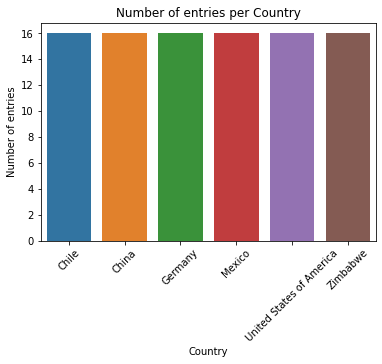

List of duplicate entries:
Empty DataFrame
Columns: [Country, Year, LifeExpectancy, GDP, size]
Index: []


In [ ]:
#@title
# We will rename the column for Life Expectancy to make it easire to work with
df.rename(columns={"Life expectancy at birth (years)": "LifeExpectancy"}, inplace=True)

# Inspect columns
print(df.info())

print("Min year = "+str(df.Year.min()))
print("Max year = "+str(df.Year.max()))

# Do a simply plot to see what countries are in the data set and how many
# per country there are.
sns.countplot(data=df, x="Country")
plt.ylabel("Number of entries")
plt.title("Number of entries per Country")
plt.xticks(rotation=45)
plt.show()

# Look for duplicate entries
grouped = df.groupby(df.columns.tolist(),as_index=False).size()
groupedDuplicates = grouped[grouped['size'] > 1]
print("List of duplicate entries:")
print(groupedDuplicates)

In [ ]:
#@title
#Do a quick check for entries that contain NaN
df[df.isna().any(axis=1)]
#Do a quick check for entries that contain Null
df[df.isnull().any(axis=1)]

,Country,Year,LifeExpectancy,GDP


# Observations of data - Part 1, Tidiness
We can see that there is indeed data for six countries and that there are 16 entries per country. This corresponds with the min/max values for the 'Year' column that we printed out. That means that, we have:

* Data for 6 countries
* Spanning from 2000 to 2015 (inclusive)
* We have the following columns: County (object), Year (int64), "Life expectancy at birthy (years)" (float64), and GDP (float64)

Misc.
* No duplicate entries have been found
* There does not appear to be any entries with NaN or null values


It does not appear that we will need to tidy the data.

# Inspect the data - Part 2, Initial Analysis
Start to look at high level statistics such as mean, etc. and make some initial plot to help identify a direction for our analysis and/or answer the question that we posed ourselves in the project scope.

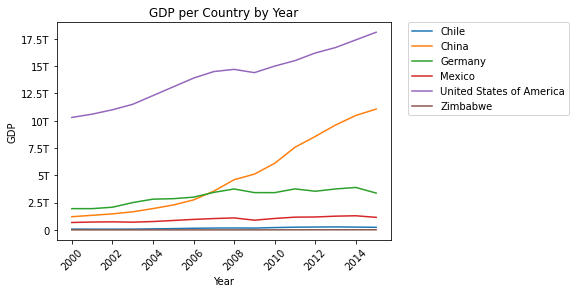

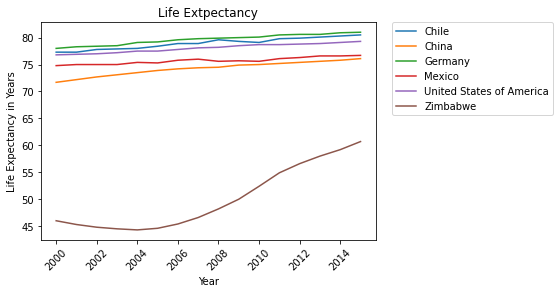

In [ ]:
#@title
plt.clf()

ax = plt.subplot()

# Plot GDP by country per year
sns.lineplot(data=df, x="Year", y="GDP", hue="Country")
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.title("GDP per Country by Year")
#Put the legend outside the box to the upper right
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.clf()
# Plot Life Expectancy by country per year
sns.lineplot(data=df, x="Year", y="LifeExpectancy", hue="Country")
plt.title("Life Extpectancy")
plt.ylabel("Life Expectancy in Years")
#Put the legend outside the box to the upper right
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)

plt.show()

In [ ]:
#@title
# Let's look at Zimbabwe
print(df[df.Country == 'Zimbabwe'])

     Country  Year  LifeExpectancy           GDP
80  Zimbabwe  2000            46.0  6.689958e+09
81  Zimbabwe  2001            45.3  6.777385e+09
82  Zimbabwe  2002            44.8  6.342116e+09
83  Zimbabwe  2003            44.5  5.727592e+09
84  Zimbabwe  2004            44.3  5.805598e+09
85  Zimbabwe  2005            44.6  5.755215e+09
86  Zimbabwe  2006            45.4  5.443896e+09
87  Zimbabwe  2007            46.6  5.291950e+09
88  Zimbabwe  2008            48.2  4.415703e+09
89  Zimbabwe  2009            50.0  8.621574e+09
90  Zimbabwe  2010            52.4  1.014186e+10
91  Zimbabwe  2011            54.9  1.209845e+10
92  Zimbabwe  2012            56.6  1.424249e+10
93  Zimbabwe  2013            58.0  1.545177e+10
94  Zimbabwe  2014            59.2  1.589105e+10
95  Zimbabwe  2015            60.7  1.630467e+10


## Zimbabwe Data
The data for Zimbabwe seems 'tidy'. The issue is simply that their GDP is much smaller than the other countries in the dataset.

## Distribution
Looking at the line graphs we get the impression that there are large differences in GDP between the countries. I will use violin plots to validate this. I will also plot Life Expectancy too.


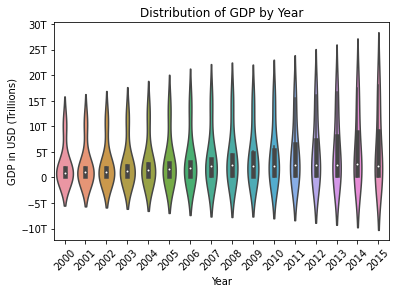

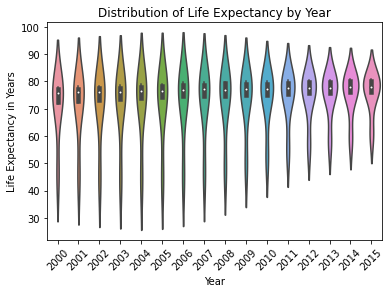

In [ ]:
#@title
plt.clf()
ax = plt.subplot()
sns.violinplot(data=df, x="Year", y="GDP")
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.title("Distribution of GDP by Year")
plt.ylabel("GDP in USD (Trillions)")
plt.xticks(rotation=45)
plt.show()

plt.clf()
sns.violinplot(data=df, x="Year", y="LifeExpectancy")
plt.title("Distribution of Life Expectancy by Year")
plt.ylabel("Life Expectancy in Years")
plt.xticks(rotation=45)
plt.show()

## Split the GDP data
There seems to be a lot of distribution in the GDP values. I will try to separate the data into large vs. small economies to get a better look.

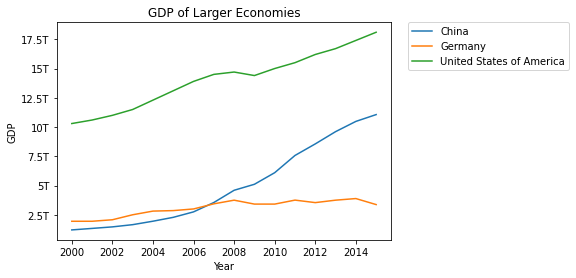

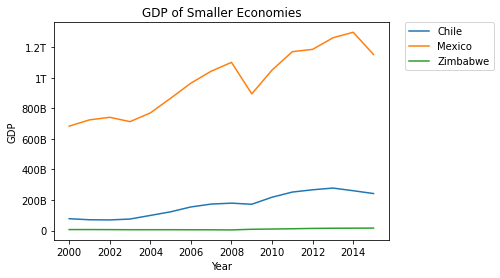

In [ ]:
#@title
#Break about data into dataframes for countries with less than $1T in GDP
#and those with more
dfGDPMean = df.groupby('Country').GDP.mean()

smallGDP = []
largeGDP = []
for k, v in dfGDPMean.items():
  if (v < 1000000000000):
    smallGDP.append(k)
  else:
    largeGDP.append(k)

  dfLargeGDP = df[df.Country.isin(largeGDP)]
  dfSmallGDP = df[df.Country.isin(smallGDP)]

#I really tried to plot with 2 y-axis, but could not get it to work.
# https://stackoverflow.com/questions/55654500/seaborn-plot-with-second-y-axis

plt.clf()
ax = plt.subplot()
# Plot- large GDP data
sns.lineplot(x="Year", y="GDP", hue="Country", data=dfLargeGDP, ax=ax)
ax.set_ylabel("GDP")
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("GDP of Larger Economies")

plt.show()

plt.clf()
# Plot - small GDP data
ax = plt.subplot()
sns.lineplot(x="Year", y="GDP", hue="Country", data=dfSmallGDP, ax=ax)
ax.set_ylabel("GDP")
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("GDP of Smaller Economies")

plt.show()

In [ ]:
#@title
#Ideally I would have plotted all lines on one chart with two y-axis. However, this proved problematic.
#Less than ideal, I would plot these two charts side-by-side. However, the scale of one impacts the
#scale of the other for the y-axis. So I plotted them separately because this part of the project
#is simply to show that indeed there is GDP for the smaller economies. I did not want to spend more
#time on this portion since it is not the main part of the analysis. A nice challege for another time.

# Observations of data - Part 2, Initial Analysis
### GDP
When we plot out the GDP by country by year we see that it is difficult to analyse the data since the GDP for these countries is nearly on a different scale (e.g. GDP in the U.S.A is much larger than Zimbabwe) which makes it difficult to state an accurate obersvation. For this reason I created a separate pair of graphs to separate the countries into two groups for small and large economies. Small economies are those whose average GDP is less than 1tUSD and large economies have an avererage greater than or equan to 1tUSD.

With these two new charts we observe the following:
* GDP ***increased*** for China, the United States, Mexico, Chile, and Germany. GDP for Germany and Chile grew significantly less than the other GDP growth countries.
* GDP appears to be stable for Zimbabwe however I think that there is still a scale problem in the data and I will look at this further in the next steps.
* Distribution is relatively limited in the beginning (year 200), but spreads out as time goes on (year 2015). We see many more outliers at the end of the period.

### Life Expectancy
* For Life Expectancy by country by year the data is more grouped and does ***increase*** in a relatively linear fashion with the ***exception of Zimbabwe***. So I looked more closely at the Zimbabwe data to make sure that there are no errors or missing data; none were found.
* After an initial dip between 2000 and 2004 life expectancy in Zimbabwe shot up quite a bit. From 44.3 years in 2004 to 60.4 at the end of 2015; an increase of 36.34% for this period.
* Distribution is spread out in the beginning of the period (year 2000), but is reduced over time (year 2015.) This is the inverse to what happens with GDP.

We see in the violin plots that there is an inverse relationship in the distribution of GDP vs. the distribution of Life Expectancy. GDP becomes much more distributed over time where Life Expectancy less so. We also see from our line plots that both GDP and Life Expectancy increase during the period. These obsevations imply that there is a a relationship between GDP and Life Expectancy.

# Data Analysis - A Deeper Dive
Now that I have checked the dat and perfomred an initial analysis, I will try to answer the question of whether or not there is a correltation between GDP and Life Expectancy.

Given the significant differences in scale for Zimababwe I will perform the analysis as follows:
1. Analyse the data for all countries.
2. Analyse the data for all countries excluding Zimbabwe.
3. Analyse the data for Zimbabwe.



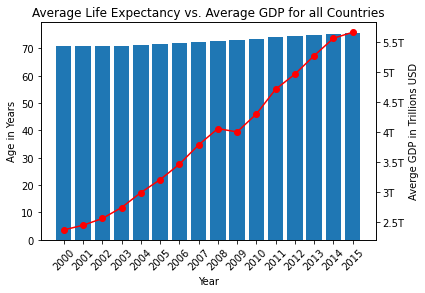

GDP changed by 138.60% during the period.
Life expectancy changed by 6.99% during the period.





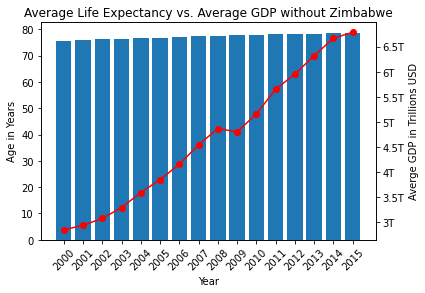

GDP changed by 138.60% during the period.
Life expectancy changed by 3.96% during the period.





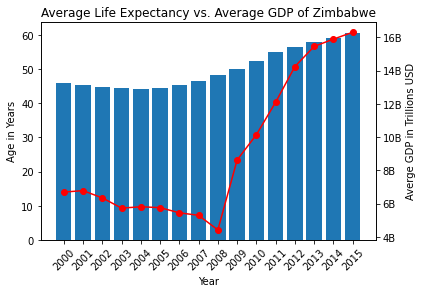

GDP changed by 143.72% during the period.
Life expectancy changed by 31.96% during the period.



Plot the data for Mexico as well since I noticed that Mexico had a slight decline in GDP at some point during the period.


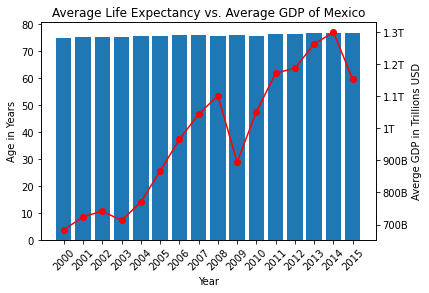

GDP changed by 68.55% during the period.
Life expectancy changed by 2.54% during the period.





In [ ]:
#@title

# Percentage change in Mean GDP and Mean Life Expectany for the group for the period
# Percentage change in GDP and Life Expectany for the period

# Look at the data for all countries.
callPlotter_and_get_percentChange(df, "Average Life Expectancy vs. Average GDP for all Countries")

# Look at the data for all countries without Zimbabwe
callPlotter_and_get_percentChange(df[df.Country != 'Zimbabwe'], "Average Life Expectancy vs. Average GDP without Zimbabwe")

# Look at the data for Zimbabwe
callPlotter_and_get_percentChange(df[df.Country == 'Zimbabwe'], "Average Life Expectancy vs. Average GDP of Zimbabwe")

print("Plot the data for Mexico as well since I noticed that Mexico had a slight decline in GDP at some point during the period.")
# Look at the data for Mexico
callPlotter_and_get_percentChange(df[df.Country == 'Mexico'], "Average Life Expectancy vs. Average GDP of Mexico")


                          LifeExpectancy
Country                                 
Chile                           78.94375
China                           74.26250
Germany                         79.65625
Mexico                          75.71875
United States of America        78.06250
Zimbabwe                        50.09375





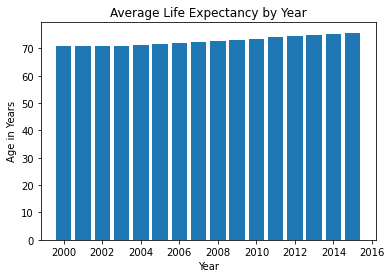


Average life expectancy for the six countries increased from 70.77 to 75.72 years.

Average life expectancy for all countries during the period was: 72.79 years.


In [ ]:
#@title
#Average life expectancy
lifeByCountry = df.drop({"Year", "GDP"}, axis = 1).groupby('Country').mean()
print(lifeByCountry)
lifeByYear = df.groupby('Year').LifeExpectancy.mean()
print("\n\n")

plt.clf()
plt.bar(lifeByYear.index, lifeByYear.values)
plt.title("Average Life Expectancy by Year")
plt.ylabel("Age in Years")
plt.xlabel("Year")
plt.show()

startAvgAge = "{:.2f}".format(lifeByYear.iloc[0])
endAvgAge = "{:.2f}".format(lifeByYear.iloc[-1])

if (endAvgAge > startAvgAge):
  print("\nAverage life expectancy for the six countries increased from "+str(startAvgAge)+" to "+str(endAvgAge)+" years.\n")
elif (endAvgAge < startAvgAge):
  print("\nAverage life expectancy for the six countries decrease from "+str(startAvgAge)+" to "+str(endAvgAge)+" years.\n")
else:
  print("\nAverage life expectancy for the six countries was unchanged.\n")


print("Average life expectancy for all countries during the period was: "+"{:.2f}".format(df.LifeExpectancy.mean())+" years.")

# Conclusion
* GDP increased for all six countries during the period.
* Average life expectancy also increased for all six countries during the same period.
  * From an average of 70.77 to an average of 75.72 years for the six countries
* There is a relationship between change in GDP and change in Life Expectancy. As GDP increase so too does life expectancy.
  * We even see (for a single case) that in Zimbabwe life expectancy declines as GDP declines. As Zimbabwe seems to be an outlier, I would not say that life expectancy declines when GDP declines. This was the case only for Zimbabwe during a sub-period. Mexico also had a decline in GDP but it was for two separate years and not a sustained period.